# 🪷 Iris Classification Project: Classifying Flower Species Using Machine Learning

In [2]:
#Import nessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [4]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load Data Set

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
print(dir(iris))

# Use 'feature_names' or fallback to column generation if needed
try:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
except AttributeError:
    # Fallback if attribute is missing
    df = pd.DataFrame(iris.data, columns=[f'feature_{i}' for i in range(iris.data.shape[1])])

# Add species labels
df['species'] = iris.target
df['species'] = df['species'].map({i: s for i, s in enumerate(iris.target_names)})

df

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
#display the head 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



# Exploratory Data Analysis


Text(0.5, 1.02, 'Pair Plot of Iris Features')

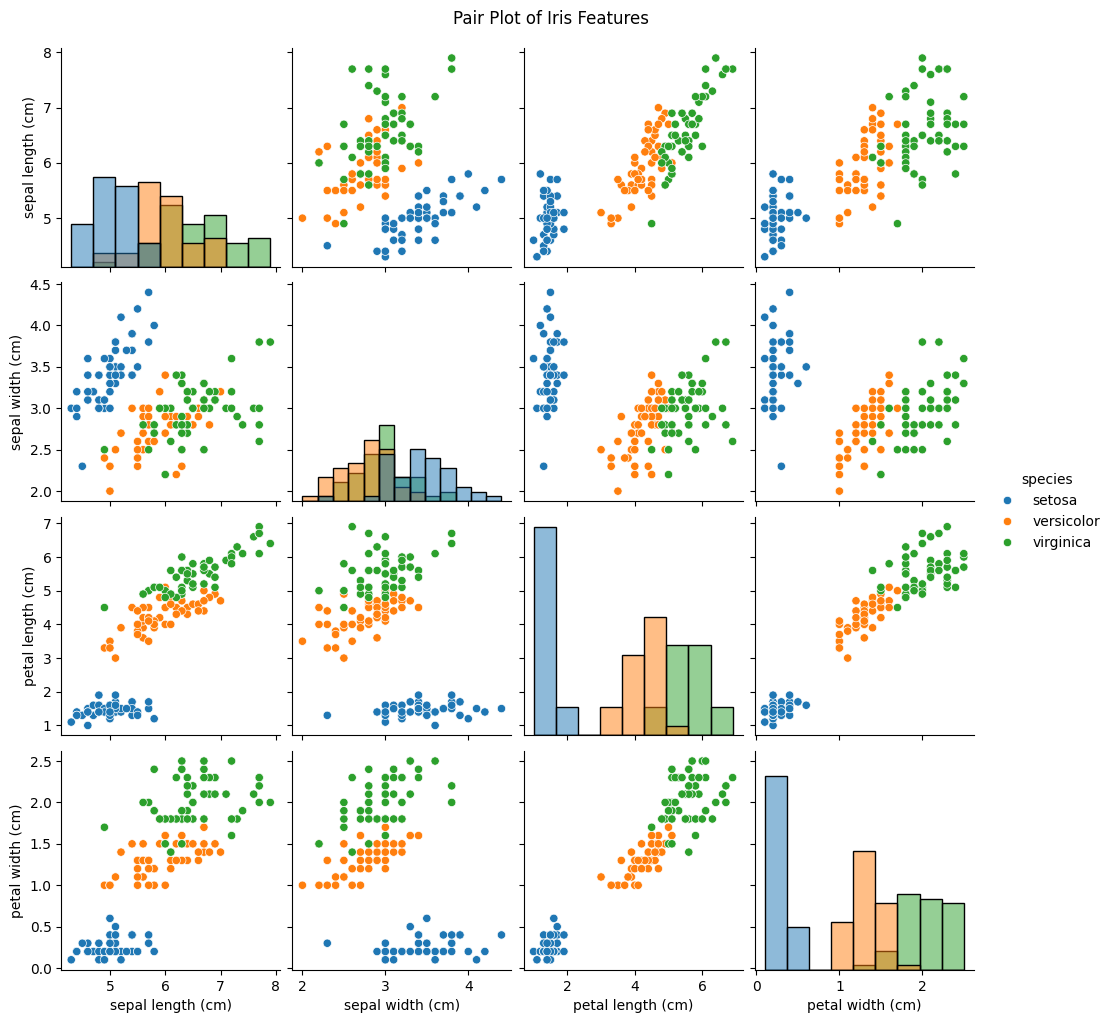

In [8]:
#apply the pairplot
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle('Pair Plot of Iris Features', y=1.02)

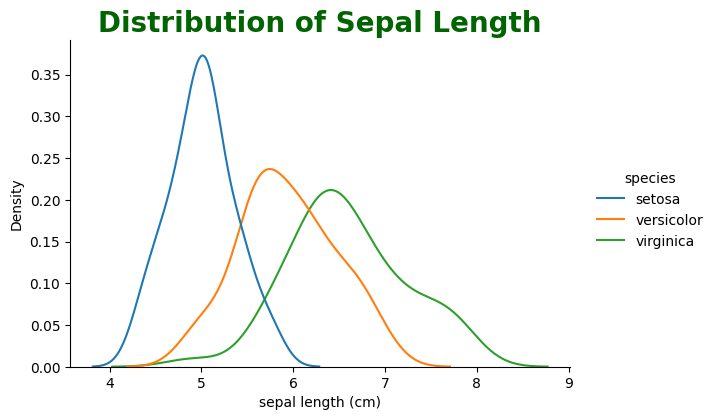

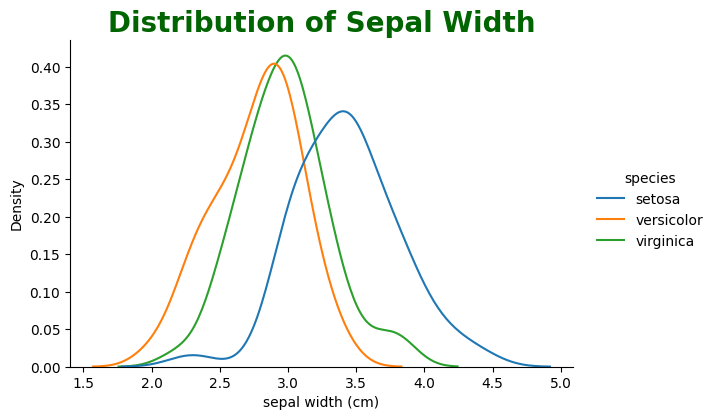

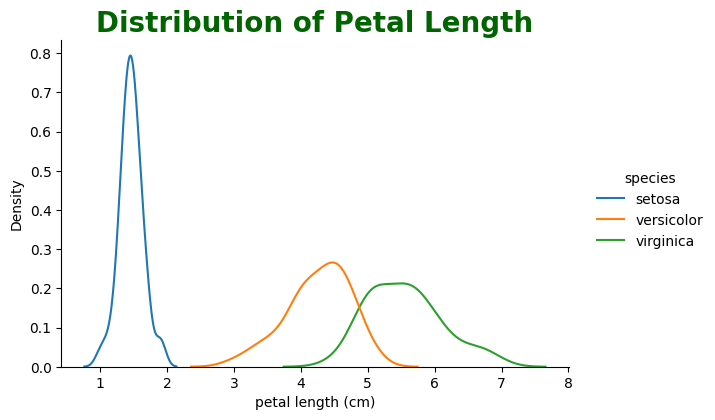

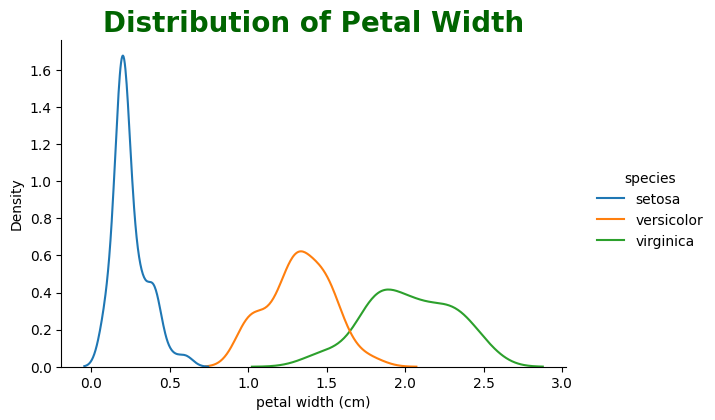

In [45]:
# Sepal Length
sns.displot(data=df, x="sepal length (cm)", hue="species", kind="kde", height=4, aspect=1.5)
plt.title("Distribution of Sepal Length", fontsize=20, fontweight='bold', color='darkgreen')
plt.show()

# Sepal Width
sns.displot(data=df, x="sepal width (cm)", hue="species", kind="kde", height=4, aspect=1.5)
plt.title("Distribution of Sepal Width", fontsize=20, fontweight='bold', color='darkgreen')
plt.show()

# Petal Length
sns.displot(data=df, x="petal length (cm)", hue="species", kind="kde", height=4, aspect=1.5)
plt.title("Distribution of Petal Length", fontsize=20, fontweight='bold', color='darkgreen')
plt.show()

# Petal Width
sns.displot(data=df, x="petal width (cm)", hue="species", kind="kde", height=4, aspect=1.5)
plt.title("Distribution of Petal Width", fontsize=20, fontweight='bold', color='darkgreen')
plt.show()

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

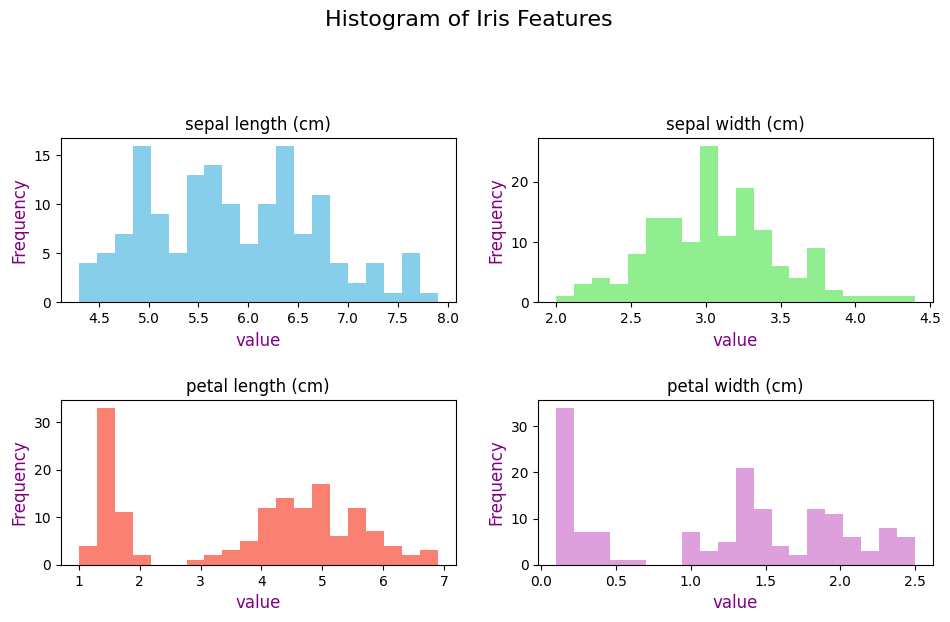

In [10]:
#Apply the Histogram 
features = df.iloc[:, 1:5]
features = df.drop(columns='species')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i in range(4):
    column = features.columns[i]
    axes[i].hist(features[column], bins=20, color = colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("value",fontsize=12, color='purple')
    axes[i].set_ylabel("Frequency", fontsize=12, color='purple')
    
plt.suptitle('Histogram of Iris Features', y=1.05, fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

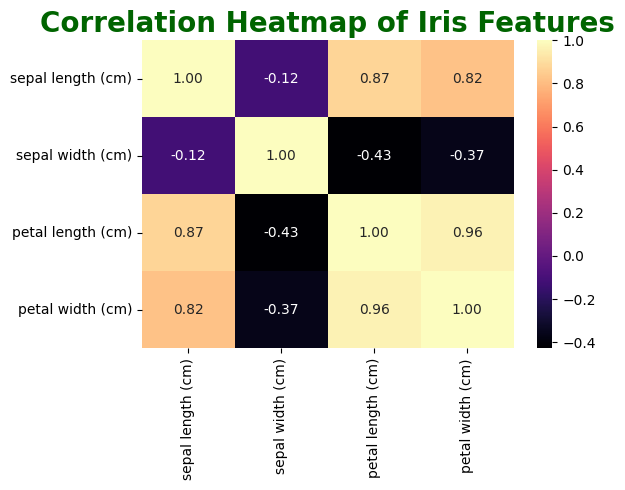

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma', fmt='.2f')
plt.title("Correlation Heatmap of Iris Features", fontsize=20, fontweight='bold', color='darkgreen')
plt.show()


 # Compare feature distributions across classes

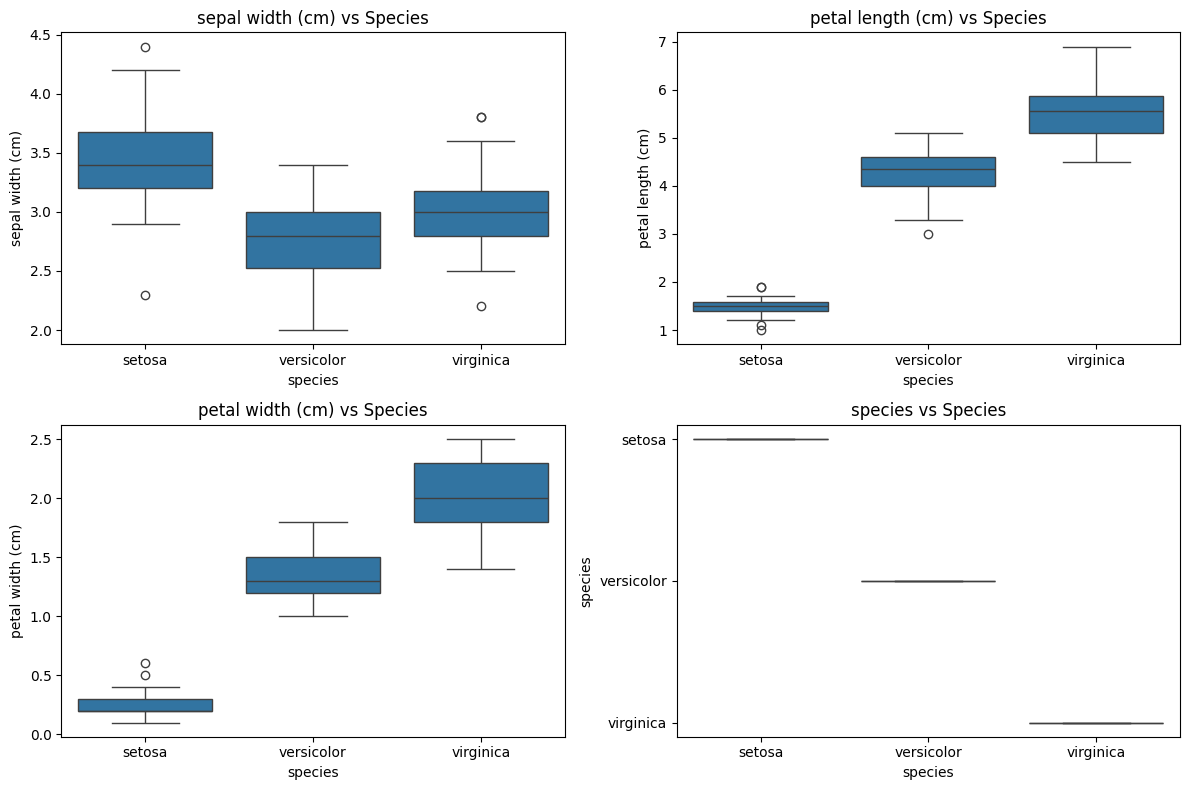

In [12]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:5]):  # Skip 'Id'
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f'{column} vs Species')
plt.tight_layout()
plt.show()

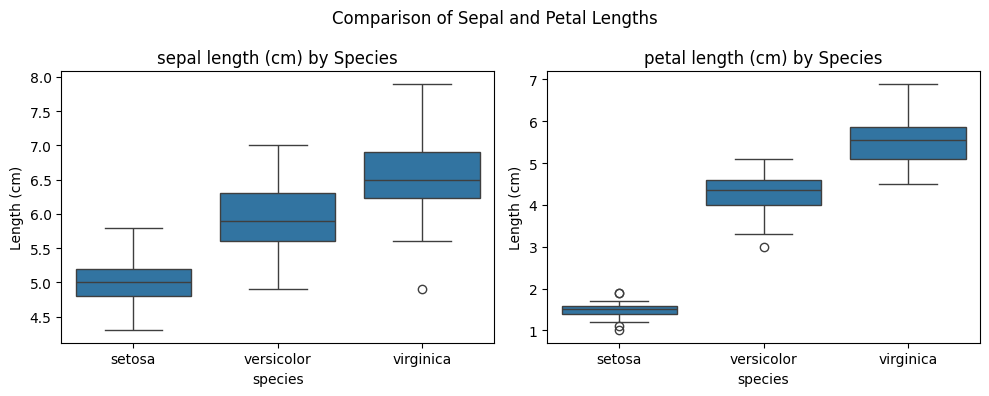

In [13]:
# Define feature groups
length_features = ['sepal length (cm)', 'petal length (cm)']

# Plot lengths
plt.figure(figsize=(10, 4))
for i, feature in enumerate(length_features):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.ylabel('Length (cm)')
plt.suptitle('Comparison of Sepal and Petal Lengths')
plt.tight_layout()
plt.show()

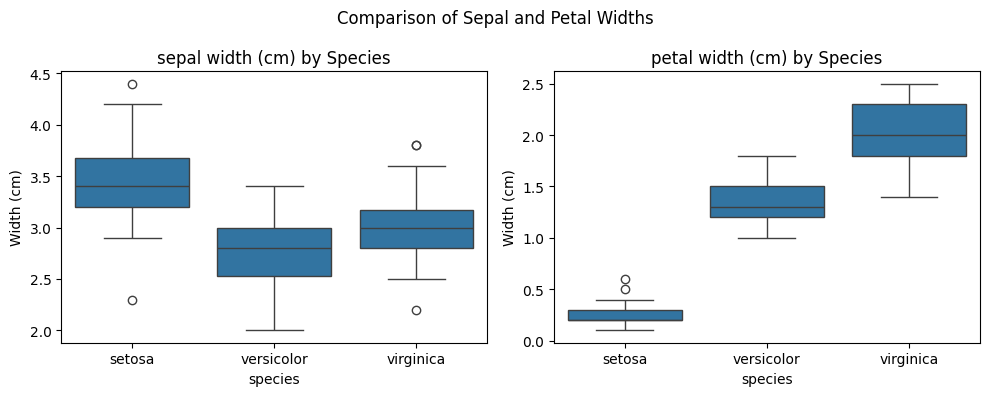

In [14]:
# Define feature groups
width_features = ['sepal width (cm)', 'petal width (cm)']


# Plot widths
plt.figure(figsize=(10, 4))
for i, feature in enumerate(width_features):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.ylabel('Width (cm)')
plt.suptitle('Comparison of Sepal and Petal Widths')
plt.tight_layout()
plt.show()

#  Violin Plots for Lengths and Widths

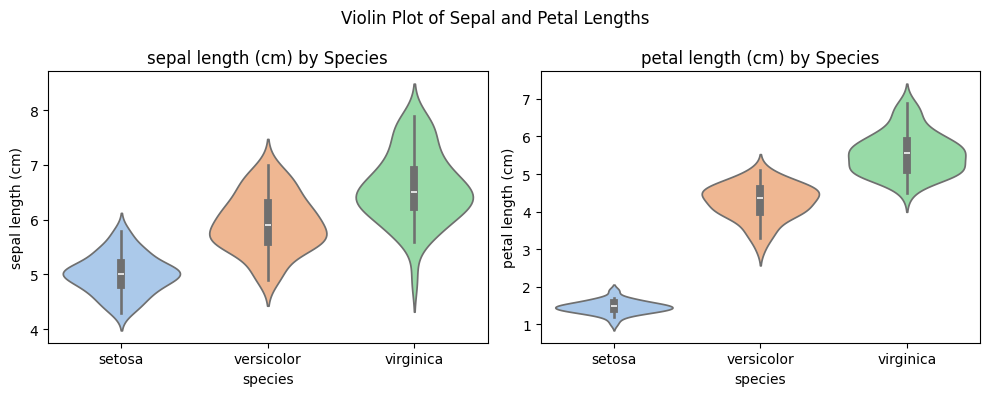

In [15]:
# Violin plots for lengths
plt.figure(figsize=(10, 4))
for i, feature in enumerate(['sepal length (cm)', 'petal length (cm)']):
    plt.subplot(1, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df, inner='box', hue='species', palette='pastel', legend=False)
    plt.title(f'{feature} by Species')
plt.suptitle('Violin Plot of Sepal and Petal Lengths')
plt.tight_layout()
plt.show()

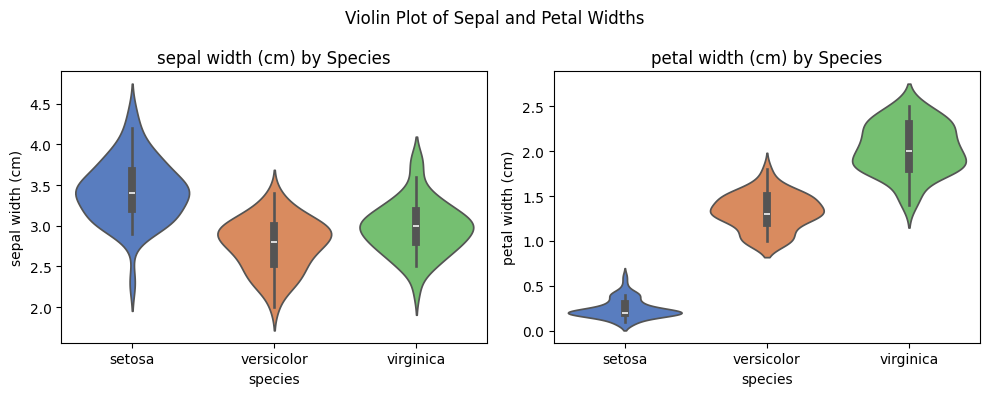

In [16]:

# Violin plots for widths
plt.figure(figsize=(10, 4))
for i, feature in enumerate(['sepal width (cm)', 'petal width (cm)']):
    plt.subplot(1, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df, inner='box', palette='muted', hue='species', legend=False)
    plt.title(f'{feature} by Species')
plt.suptitle('Violin Plot of Sepal and Petal Widths')
plt.tight_layout()
plt.show()

# Swarm Plots for Detailed Points

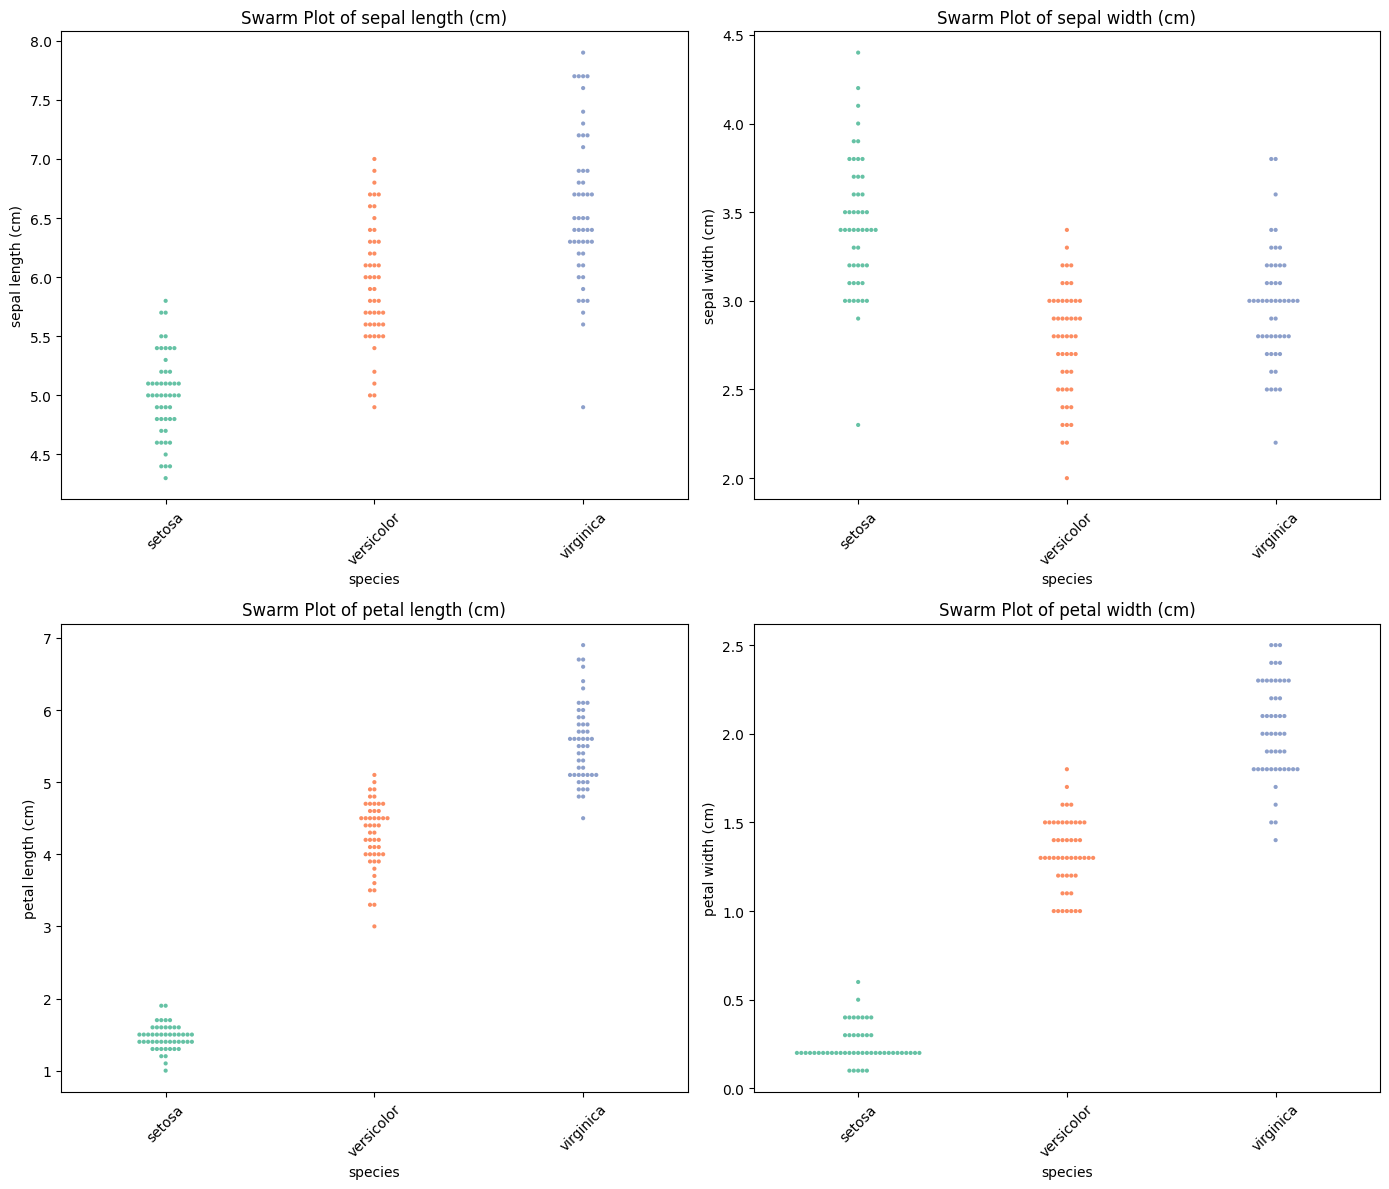

In [17]:
# Swarm plot for all features (lengths and widths)
plt.figure(figsize=(14, 12))
features = df.columns[:4]  # first 4 numeric features

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.swarmplot(x='species', y=feature, data=df, palette='Set2', hue='species', legend=False, size=3)
    plt.title(f'Swarm Plot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='species', ylabel='petal width (cm)'>

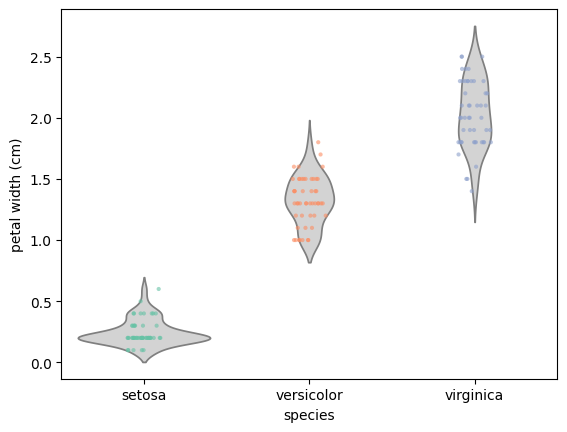

In [18]:
# Hybrid violin + strip (jittered) plot to avoid swarm overlap warning
sns.violinplot(x='species', y=feature, data=df, inner=None, color='lightgray')
sns.stripplot(x='species', y=feature, data=df, palette='Set2', hue='species', legend=False, size=3, jitter=True, alpha=0.6)

 # Data Preprocessing

In [25]:
#check missing values 
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [26]:
#feature and label
X = df.drop('species', axis=1)
y = df['species']

In [27]:
#Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)


 # Model Selection and Training

In [29]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))



Model: KNN
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Model: Decision Tree
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Model: Random Forest
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa    

<Axes: xlabel='actual', ylabel='setosa'>

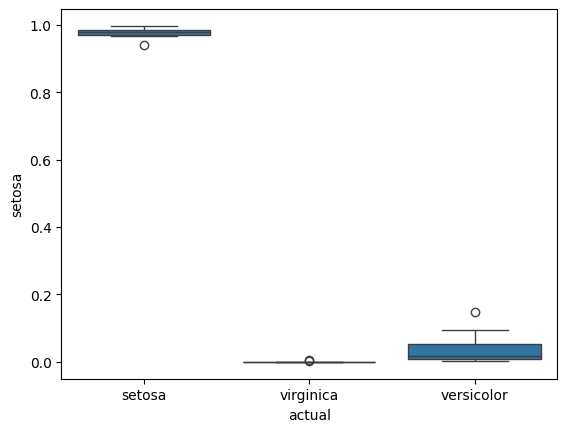

In [30]:
#Boxplot of prediction confidence per class
probs = model.predict_proba(X_test)
predicted_classes = model.predict(X_test)
df_results = pd.DataFrame(probs, columns=model.classes_)
df_results['actual'] = y_test.values
df_results['predicted'] = predicted_classes

sns.boxplot(x='actual', y='setosa', data=df_results) 

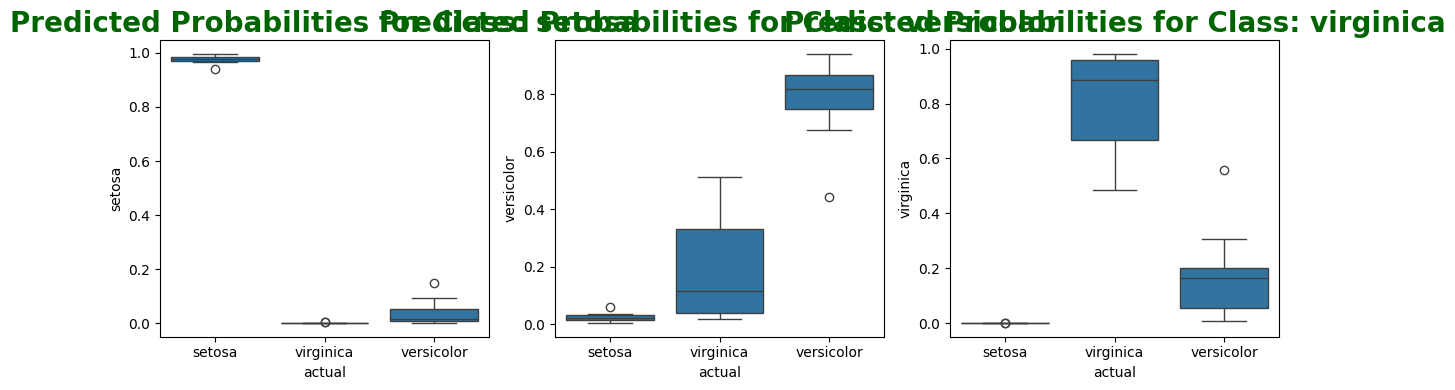

In [31]:
plt.figure(figsize=(12, 4))
for i, cls in enumerate(model.classes_):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='actual', y=cls, data=df_results)
    plt.title(f'Predicted Probabilities for Class: {cls}', color='Darkgreen', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

 # Cross Validation Scores

In [32]:
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} Avg CV Accuracy: {np.mean(scores): .4f}")

KNN Avg CV Accuracy:  0.9600
Decision Tree Avg CV Accuracy:  0.9533
Random Forest Avg CV Accuracy:  0.9667
SVM Avg CV Accuracy:  0.9667
Logistic Regression Avg CV Accuracy:  0.9600


 # Hyperparameter Tuning (KNN)

In [33]:
param_grid = {'n_neighbors': range(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_scaled, y)
print("Best K:", grid.best_params_)

Best K: {'n_neighbors': 6}


# Dimensionality Reduction / PCA Visualization

Text(0.5, 1.0, 'PCA of Iris Dataset')

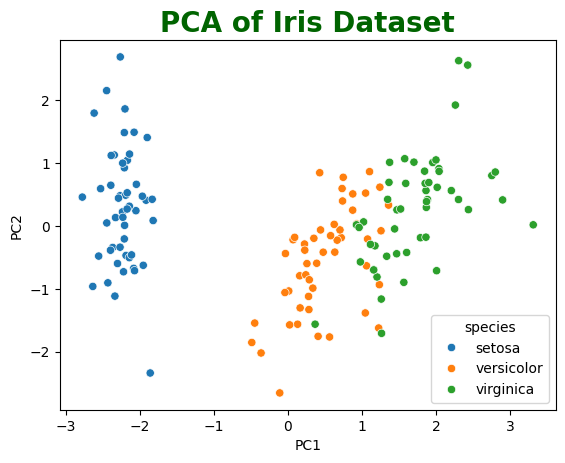

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y.values

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species')
plt.title("PCA of Iris Dataset", fontsize=20, fontweight='bold', color='darkgreen')

 # Insights from Iris Classification Project
# Setosa is clearly separable from the other two species in almost all feature combinations (especially petal length and width).

# Versicolor and Virginica show more overlap, making them harder to distinguish, especially in sepal-based features.

# Random Forest and SVM models usually deliver higher accuracy and generalization performance due to their robustness and ability to handle non-linear boundaries.

# PCA (Principal Component Analysis) is useful for visualizing class separability and reducing dimensionality while retaining key variance in the data.

# KNN with k=3 to 5 provides a good balance between bias and variance, especially when the data is well-scaled and not too high-dimensional.